In [1]:
# import numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# import matplotlib for data visulization
import matplotlib.pyplot as plt

# import os to read system directory
import os

# import train_test_split to split the data into training set and validating set, 
# RandomizedSearchCV for cross validation and GridSearchCV for hyperparameters tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# import MinMaxScaler to normalize the data and OneHotEncoder to encode the categorical features as one-hot numeric arrays
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# import SimpleImputer to impute missing values
from sklearn.impute import SimpleImputer 

# import different classification methods of machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# import mean_absolute_error to measure the performance of a specific method
from sklearn.metrics import mean_absolute_error

In [2]:
# get the current working directory
path=os.getcwd()
# read the training data
train_data_full = pd.read_csv(path+'/train.csv')
# display the first 5 rows of the training data
train_data_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# get an overview of the training data
train_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# find the numerical columns
numerical_columns = [col for col in train_data_full.columns if train_data_full[col].dtype in ['int64', 'float64']]
# drop the target 'SalePrice'
numerical_columns.pop(-1)
print(numerical_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [5]:
# find the categorical columns
categorical_columns = [col for col in train_data_full.columns if train_data_full[col].dtype=='object']
print(categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [6]:
# drop those features with high cardinality. e.g. more than 20 unique values for a given feature
categorical_columns = [col for col in categorical_columns if pd.Series(train_data_full[col].unique()).value_counts().sum()<=20]

In [7]:
# combine the numerical features and categorical features
my_cols = numerical_columns + categorical_columns

In [8]:
# Split the features and target from the training data
X_full = train_data_full[my_cols]
y_full = train_data_full.SalePrice

In [9]:
# Splitting the training data into training set and validating set
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.8, test_size=0.2, random_state=42)

In [10]:
# create two imputers to impute the missing values of categorical features and numerical features
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

In [11]:
# impute the missing values
X_train_cat = pd.DataFrame(imputer_cat.fit_transform(X_train[categorical_columns]), columns=categorical_columns)
X_train_num = pd.DataFrame(imputer_num.fit_transform(X_train[numerical_columns]), columns=numerical_columns)
X_valid_cat = pd.DataFrame(imputer_cat.transform(X_valid[categorical_columns]), columns=categorical_columns)
X_valid_num = pd.DataFrame(imputer_num.transform(X_valid[numerical_columns]), columns=numerical_columns)

In [12]:
# check if there is no missing value after imputation
X_train_cat.isnull().sum().sum() + X_train_num.isnull().sum().sum() + X_valid_cat.isnull().sum().sum() + X_valid_num.isnull().sum().sum() == 0

True

In [13]:
# create a one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [14]:
# encode the categorical features as one-hot arrays
X_train_cat_oh = OH_encoder.fit_transform(X_train_cat)
X_valid_cat_oh = OH_encoder.transform(X_valid_cat)
OH_column_names = OH_encoder.get_feature_names(categorical_columns)

In [15]:
# transform them into DataFrame
X_train_cat_OH = pd.DataFrame(X_train_cat_oh, columns=OH_column_names)
X_valid_cat_OH = pd.DataFrame(X_valid_cat_oh, columns=OH_column_names)

In [16]:
# combine the numerical and categorical features
X_train_OH = pd.concat([X_train_num, X_train_cat_OH], axis=1)
X_valid_OH = pd.concat([X_valid_num, X_valid_cat_OH], axis=1)

In [17]:
# Normalize the data to the range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_final = scaler.fit_transform(X_train_OH)
X_valid_final = scaler.transform(X_valid_OH)

In [18]:
# Convert y to one-dimensional array
y_train_final = np.array(y_train).reshape((-1, ))
y_valid_final = np.array(y_valid).reshape((-1, ))

In [19]:
# function to quickly evaluate the performance for a given method with default settings
def fit_and_evaluate(model):
    model.fit(X_train_final, y_train_final)
    
    y_pred = model.predict(X_valid_final)
    model_score = mean_absolute_error(y_valid_final, y_pred)

    return model_score

In [20]:
# fit the data using Linear Regression and print the MAE of the prediction
lr = LinearRegression()
lr_score = fit_and_evaluate(lr)
print(lr_score)

25757249684314.996


In [21]:
# fit the data using Supporting Vector Regressor and print the MAE of the prediction
svr = SVR()
svr_score = fit_and_evaluate(svr)
print(svr_score)

59526.78583998964


In [22]:
# fit the data using Random Forest Regressor and print the MAE of the prediction
random_forest = RandomForestRegressor(random_state=42)
random_forest_score = fit_and_evaluate(random_forest)
print(random_forest_score)

17547.91979452055


In [23]:
# fit the data using Gradient Boosting Regressor and print the MAE of the prediction
gradient_boosted = GradientBoostingRegressor(random_state=42)
gradient_boosted_score = fit_and_evaluate(gradient_boosted)
print(gradient_boosted_score)

17220.571712877176


In [24]:
# fit the data using k-Nearest Neighbours Regressor and print the MAE of the prediction
knn = KNeighborsRegressor(n_neighbors=10)
knn_score = fit_and_evaluate(knn)
print(knn_score)

27458.405136986297


In [25]:
# fit the data using Extreme Gradient Boosting Regressor and print the MAE of the prediction
Xgb = xgb.XGBRegressor(random_state=42)
xgb_score = fit_and_evaluate(Xgb)
print(xgb_score)

17216.568613548803


In [26]:
# Step size shrinkage used in update to prevents overfitting
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1]

# Number of trees used in the boosting process
n_estimators = [100, 500, 1000, 1500, 2000, 2500]

# Maximum depth of each tree
max_depth = [3, 5, 10, 15, 20]

# L1 regularization term on weights
alpha = [1, 5, 10, 15, 20]

# Subsample ratio of columns when constructing each tree
colsample_bytree = [0.1, 0.3, 0.5]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'learning_rate':learning_rate, 'n_estimators':n_estimators, 'max_depth':max_depth,
                        'alpha':alpha, 'colsample_bytree':colsample_bytree}

In [27]:
# create a randomized search for the given hyperparameters
model = xgb.XGBRegressor()

random_cv = RandomizedSearchCV(estimator=model, param_distributions=hyperparameter_grid, cv=5, n_iter=25,
                                scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1, return_train_score = True, random_state=42)

In [28]:
# perform the randomized search with 5-fold cross validation
random_cv.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [29]:
# display the randomized search results
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending=False)
random_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,param_alpha,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
12,19.144695,2.105191,0.120607,0.014624,2500,5,0.005,0.3,15,"{'n_estimators': 2500, 'max_depth': 5, 'learni...",...,-15740.938112,1655.294092,1,-4499.092863,-4445.527001,-4506.793471,-4290.738695,-4508.251299,-4450.080666,82.961389
15,5.513315,0.637724,0.021601,0.006086,1000,3,0.05,0.3,15,"{'n_estimators': 1000, 'max_depth': 3, 'learni...",...,-15753.803987,1226.637076,2,-4466.707408,-4670.623126,-4364.677086,-4679.249787,-4600.470559,-4556.345593,122.379434
19,8.061861,0.857179,0.023801,0.002482,1500,3,0.01,0.3,15,"{'n_estimators': 1500, 'max_depth': 3, 'learni...",...,-15841.066861,1673.085303,3,-8702.547389,-8422.355025,-8244.646041,-8545.875810,-8686.205477,-8520.325949,171.447473
24,11.823876,2.381383,0.032202,0.007627,2500,3,0.05,0.3,20,"{'n_estimators': 2500, 'max_depth': 3, 'learni...",...,-15943.433007,1110.039351,4,-1541.087995,-1533.192912,-1585.209474,-1565.642455,-1615.949394,-1568.216446,30.121167
0,8.604892,1.081250,0.094005,0.012166,2000,5,0.005,0.1,10,"{'n_estimators': 2000, 'max_depth': 5, 'learni...",...,-15977.836362,1510.446963,5,-6461.810706,-6353.243597,-6568.900524,-6389.383819,-6582.453037,-6471.158337,92.323758


In [30]:
# output the best hyperparameters combination which achives lowest MAE
random_cv.best_estimator_

XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=15, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# to further tune the hyperparameters, we use GridSearchCV to investigate the MAE with repsect to the number of trees
trees_grid = {'n_estimators':[1600, 1900, 2200, 2500, 2800, 3100, 3400]}

model = xgb.XGBRegressor(learning_rate=0.005, max_depth=5, alpha=15, colsample_bytree=0.3,
                                    random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=5, scoring='neg_mean_absolute_error', 
                            verbose=1, n_jobs=-1, return_train_score=True)

In [32]:
# perform the grid search
grid_search.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  3.0min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(alpha=15, base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.3,
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.005, max_delta_step=None,
                                    max_depth=5, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate

Text(0.5, 1.0, 'Performance vs Number of Trees')

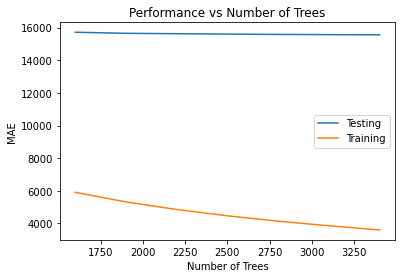

In [33]:
# visulize the results for different number of trees
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results['param_n_estimators'], -1*results['mean_test_score'], label='Testing')
plt.plot(results['param_n_estimators'], -1*results['mean_train_score'], label='Training')
plt.xlabel('Number of Trees'); plt.ylabel('MAE'); plt.legend()
plt.title('Performance vs Number of Trees')

In [34]:
# output the hyperparameters with best performance
final_model = grid_search.best_estimator_

final_model

XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3400, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=15, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# use the best model to fit the training data
final_model.fit(X_train_final, y_train_final)

XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3400, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=15, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# read the test data
test_data_full = pd.read_csv(path+'/test.csv')

In [37]:
# impute the missing values for the test data
X_test_cat = pd.DataFrame(imputer_cat.transform(test_data_full[categorical_columns]), columns=categorical_columns)
X_test_num = pd.DataFrame(imputer_num.transform(test_data_full[numerical_columns]), columns=numerical_columns)

In [38]:
# encode the categorical features as one hot arrays
X_test_cat_OH = pd.DataFrame(OH_encoder.transform(X_test_cat), columns=OH_column_names)

In [39]:
# combine the numerical and categorical features as a single DataFrame
X_test_OH = pd.concat([X_test_num, X_test_cat_OH], axis=1)

In [40]:
# normalize the test data
X_test_final = scaler.transform(X_test_OH)

In [41]:
# use the best model to predict the result for the test data
y_test = final_model.predict(X_test_final)

In [42]:
# export the result as a csv file
res = pd.DataFrame({'Id': test_data_full.Id, 'SalePrice': y_test})
res.to_csv('predictions.csv', index=False)